In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import cufflinks as cf
cf.go_offline()
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report #to get a report on precision, recall, etc wrt the predictions and true values
%matplotlib inline

In [2]:
train = pd.read_csv('titanic_train.csv')
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


<AxesSubplot:>

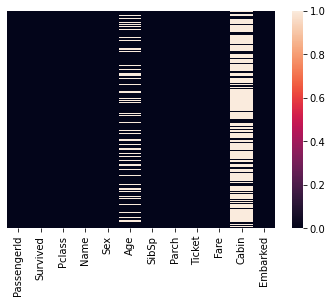

In [3]:
#to see where the data is missing
sns.heatmap(train.isnull(), yticklabels=False)

Exploratory Data Analysis

<AxesSubplot:xlabel='Survived', ylabel='count'>

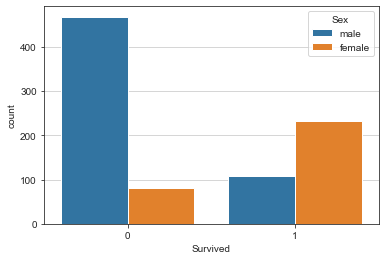

In [4]:
#to study survivors based on sex
sns.set_style("ticks", {'axes.grid':True}) #to get grid in the plots
sns.countplot(x='Survived', data=train, hue='Sex')

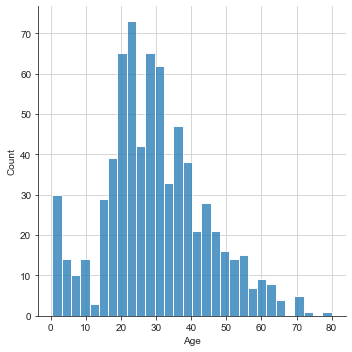

In [5]:
#study suvivors based on age
sns.displot(train['Age'].dropna(), bins=30)

<AxesSubplot:xlabel='SibSp', ylabel='count'>

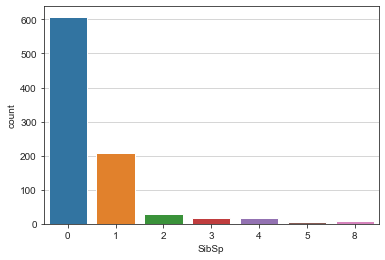

In [6]:
#siblings/spouse data
sns.countplot(x='SibSp', data=train)

In [7]:
#fare
train['Fare'].iplot(kind='hist', bins=30)

To deal with/remove all missing values

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

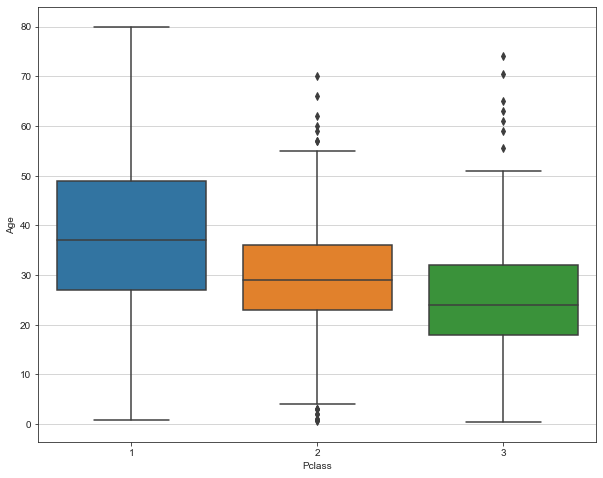

In [8]:
#pclass vs age to predict age wrt class
plt.figure(figsize=(10,8))
sns.boxplot(x='Pclass', y='Age', data=train)

In [9]:
#function to fill in null values in age with average age wrt each class
def impute_age(cols):
    age = cols[0]
    pclass = cols[1]
    
    if pd.isnull(age):
        if pclass == 1:
            return 37
        elif pclass == 2:
            return 29
        else:
            return 24
    else:
        return age

In [10]:
#applying the function to the dataframe
train['Age'] = train[['Age', 'Pclass']].apply(impute_age, axis=1)

<AxesSubplot:>

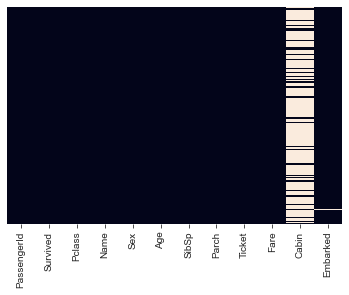

In [11]:
#checking if still there are any null values in age column
sns.heatmap(train.isnull(), yticklabels=False, cbar=False)

In [12]:
#cabin column has too many null values, so it can't be predicted and isn't useful to us
#hence we drop the column
train.drop('Cabin', axis=1, inplace=True)

In [13]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


<AxesSubplot:>

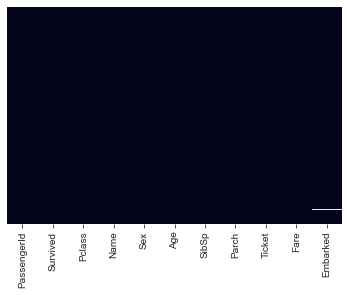

In [14]:
sns.heatmap(train.isnull(), yticklabels=False, cbar=False)

In [15]:
#to remove all the null values now, dropna
train.dropna(inplace=True)

<AxesSubplot:>

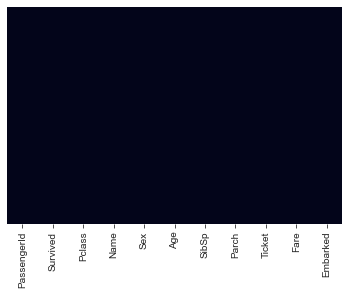

In [16]:
sns.heatmap(train.isnull(), yticklabels=False, cbar=False)

To deal with/convert all categorical data to a dummy variable

Since a machine learning algorithm can't take in a category like male or female in and work with it, we will have to use a dummy variable like replacing male/female with 0/1 in order to make it useful for the machine learning algorithm

In [17]:
#to convert categorical data into dummy variables, use the method in pandas pd.get_dummies(column)
pd.get_dummies(train['Sex'])

,female,male
0,0,1
1,1,0
2,1,0
3,1,0
4,0,1
...,...,...
886,0,1
887,1,0
888,1,0
889,0,1


In [18]:
#as you can see, it divides the column into 2 categories and 0 means false and 1 means true
#now the problem is that if it is passed to the ml algorithm like this, it will be able to predict the value of the second column perfectly because if female is 0 means male will be 1
#this will mess up the algorithm as it can perfectly predict a column based on a column and it's not the same for other columns
#hence we drop either of those columns so for eg - we get only male column as true or false data using drop_first=bool
sex = pd.get_dummies(train['Sex'], drop_first=True)
sex.head()

,male
0,1
1,0
2,0
3,0
4,1


In [19]:
#we will get 3 embarked columns and we can do the same, drop first columnn and it'll work because no single column is the perfect predictor of the other columnm
embarked = pd.get_dummies(train['Embarked'], drop_first=True)
embarked.head()

,Q,S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1


In [20]:
#to add these columns to the dataframe, we use pd.concat()
train = pd.concat([train, sex, embarked], axis=1)
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,male,Q,S
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,1,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,0,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,0,0,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,1,0,1


In [21]:
#dropping the og columns that we just converted to dummy variables and the other columns that we won't be using in the ml algorithm
train.drop(['Sex', 'Embarked', 'Name', 'Ticket'], axis=1, inplace=True)

In [22]:
#we won't be using the passengerid column too as it's just a column with indices and we have no use for that
train.drop(['PassengerId'], axis=1, inplace=True)

In [23]:
#now the dataframe is perfect for a ml algorithm
train.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,0,3,22.0,1,0,7.2500,1,0,1
1,1,1,38.0,1,0,71.2833,0,0,0
2,1,3,26.0,0,0,7.9250,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,1
4,0,3,35.0,0,0,8.0500,1,0,1


Applying Machine Learning Algorithm To Predict If A Person Survived Or Not Based On Their Features

In [24]:
#x = features = all columns except survived
#y = variable to be predicted = survived column
#using the train dataset as whole data & splitting it for practice
x = train.drop('Survived', axis=1)
y = train['Survived']

In [25]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=101)

In [26]:
logmodel = LogisticRegression(max_iter=400)

In [27]:
logmodel.fit(x_train, y_train)

LogisticRegression(max_iter=400)

In [28]:
predictions = logmodel.predict(x_test)

In [29]:
#to get a report regarding the predictions wrt the true values
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.82      0.92      0.87       163
           1       0.85      0.69      0.76       104

    accuracy                           0.83       267
   macro avg       0.84      0.81      0.82       267
weighted avg       0.83      0.83      0.83       267

